In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/yasserh/walmart-dataset

In [2]:
retail_data = pd.read_csv("datasets/Walmart.csv")

retail_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
retail_data.shape

(6435, 8)

#### No duplicates

In [4]:
retail_data[retail_data.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


#### No nulls

In [5]:
retail_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### changing the Date column datatype from object to datetime64

In [7]:
retail_data["Date"] = pd.to_datetime(retail_data["Date"])

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Getting summary statistics of each column

In [8]:
retail_data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1301,10,2010-05-14,1808056.41,0,73.88,3.145,126.208548,9.524
3247,23,2012-01-13,1031451.35,0,28.49,3.523,136.753000,4.261
1153,9,2010-09-04,529384.31,0,64.95,2.770,214.139913,6.384
3939,28,2011-05-08,1523870.89,0,90.61,3.803,129.184645,13.503
3297,24,2010-02-04,1478321.26,0,45.22,2.957,131.901968,8.211


#### creating new columns Month and Quarter
* https://pandas.pydata.org/docs/reference/api/pandas.PeriodIndex.html

In [9]:
retail_data["Month"] = retail_data["Date"].dt.month
retail_data["Quarter"] = retail_data["Date"].dt.quarter
retail_data["Year"] = retail_data["Date"].dt.year

retail_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Quarter,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,1,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,1,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2,2010


#### visualizing the outliers
* here sales is a continious variable ie they can have infinite number of values between the lowest and the highest point of measurment therefore it makes no sense to remove them

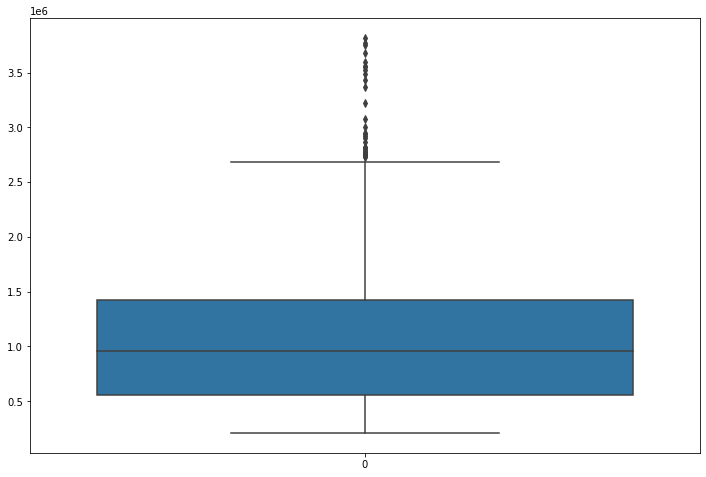

In [10]:
plt.figure(figsize=[12, 8])

sns.boxplot(data=retail_data["Weekly_Sales"])

plt.show()

#### Median sales higher during holidays

#### Fewer outliers on holidays

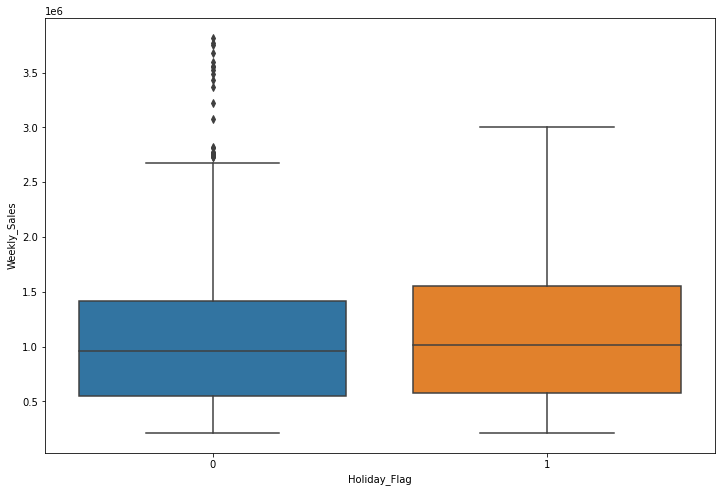

In [11]:
plt.figure(figsize=[12, 8])

sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=retail_data)

plt.show()

#### Sales by month. December is having highest avg sales, followed by November.

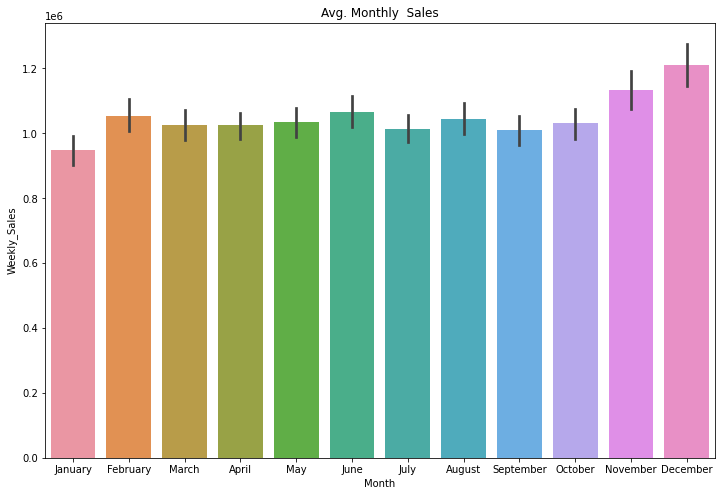

In [12]:
plt.figure(figsize=[12, 8])

fig = sns.barplot(x="Month", y="Weekly_Sales", data=retail_data)

fig.set(xticklabels=["January", "February", "March", "April", 
                     "May", "June", "July", "August", "September", 
                     "October", "November", "December"])

plt.title("Avg. Monthly  Sales")
plt.show()

Total sales(period of 3 yrs) for April and July seems to be highest. Note that estimator is sum.By default it is mean in seaborn barplot.

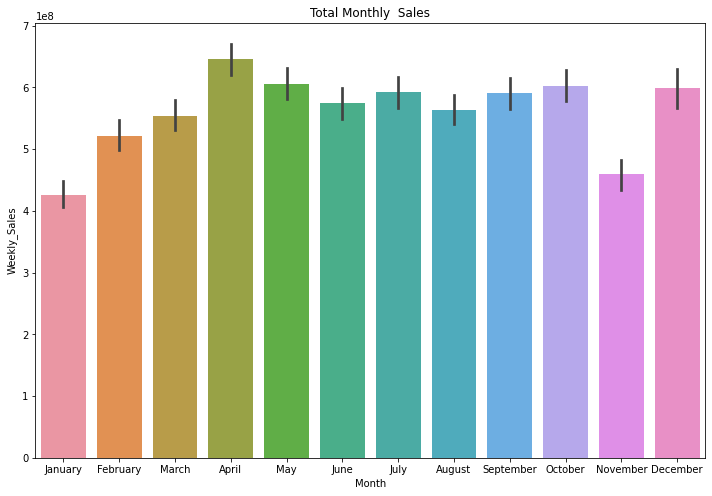

In [13]:
plt.figure(figsize=[12, 8])

fig = sns.barplot(x="Month", y="Weekly_Sales", data=retail_data, estimator=np.sum)

fig.set(xticklabels=["January", "February", "March", "April", 
                     "May", "June", "July", "August", "September", 
                     "October", "November", "December"])

plt.title("Total Monthly  Sales")
plt.show()

Avg. Quarterly sales for 4th quarter is highest

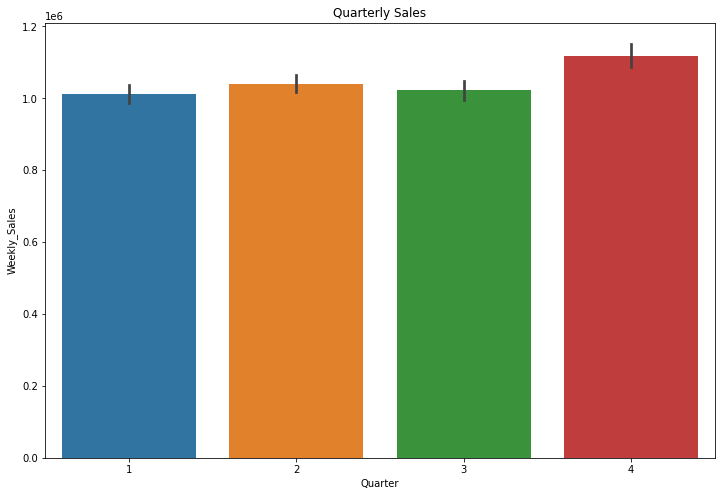

In [14]:
plt.figure(figsize=[12, 8])

fig = sns.barplot(x="Quarter", y="Weekly_Sales", data=retail_data)

plt.title("Quarterly Sales")
plt.show()

#### store 20 and 4 have the highest average sales

In [15]:
store_sales = retail_data[["Store", "Weekly_Sales"]].groupby("Store").mean()

store_sales = store_sales.sort_values(by="Weekly_Sales", ascending=False).reset_index()

store_sales.head(10)

,Store,Weekly_Sales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06
5,10,1.899425e+06
6,27,1.775216e+06
7,6,1.564728e+06
8,1,1.555264e+06
9,39,1.450668e+06


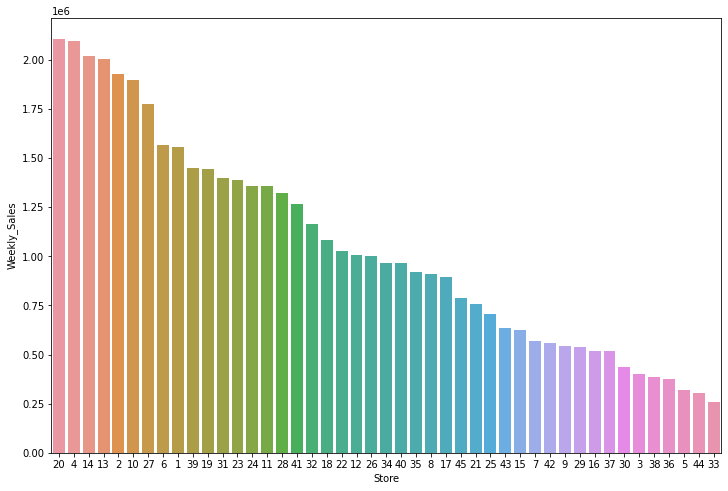

In [16]:
plt.figure(figsize = [12, 8])

sns.barplot(x="Store", y="Weekly_Sales", data=store_sales, order=store_sales["Store"])

plt.show()

Obtaining correlation scores between numeric feature pairs

In [17]:
retail_data_cont_vars = retail_data[["Weekly_Sales", "Temperature", "Fuel_Price", 
                                     "CPI", "Unemployment"]]

corr_mat = retail_data_cont_vars.corr()

corr_mat

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


#### Above matrix is visualised in a heat map form for more clarity

Weak negative correlation(-0.3) observed between CPI and Unemployment. More CPI(inflation) indicating less unemployment

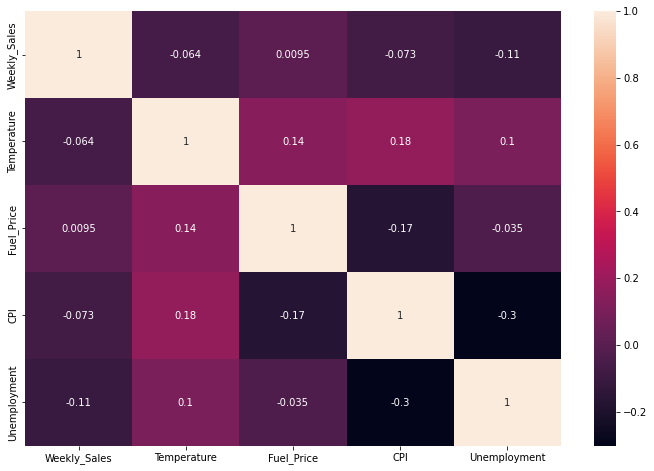

In [18]:
plt.figure(figsize = [12, 8])

sns.heatmap(corr_mat, annot=True)

plt.show()

Plotting boxplots for showing distribution of continuous variables.Temperature has outliers towards lower extreme.Unemployment has outliers towards upper extreme.

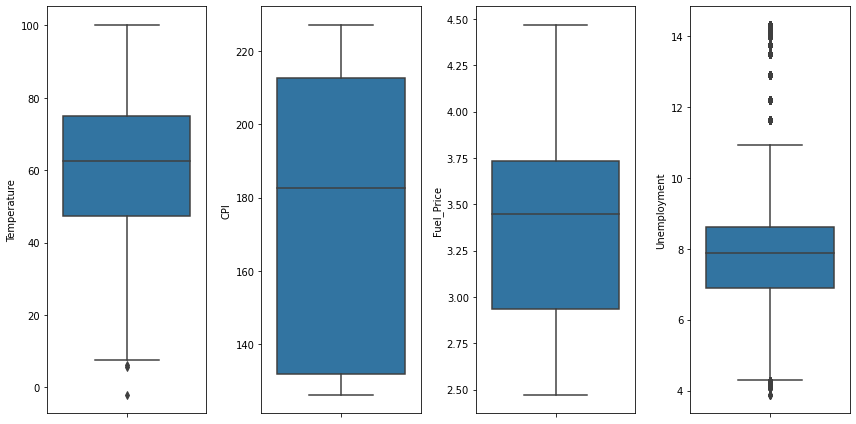

In [19]:
f, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(12, 6))

sns.boxplot(y='Temperature', data=retail_data, ax=ax1)

sns.boxplot(y='CPI', data=retail_data, ax=ax2)

sns.boxplot(y='Fuel_Price', data=retail_data, ax=ax3)

sns.boxplot(y='Unemployment', data=retail_data, ax=ax4)


plt.tight_layout()

plt.show()

In [20]:
retail_df = retail_data.copy()

features_with_outliers =  ["Unemployment", "Temperature"]

for i in features_with_outliers:
    Q1 = retail_df[i].quantile(0.25)
    Q3 = retail_df[i].quantile(0.75)

    IQR = Q3 - Q1
    
    retail_df = retail_df[(retail_df[i] <= (Q3 + (1.5*IQR))) & (retail_df[i] >= (Q1-(1.5*IQR)))]

    retail_df = retail_df.reset_index(drop=True)

Here We are showing outlier removal technique.There are other methods to treat outliers. Decision to be taken according to field of Business.

Checking the distribution post outlier removal.Note that post removal of outliers in unemployment, the distribution got modified and new outliers can be seen.

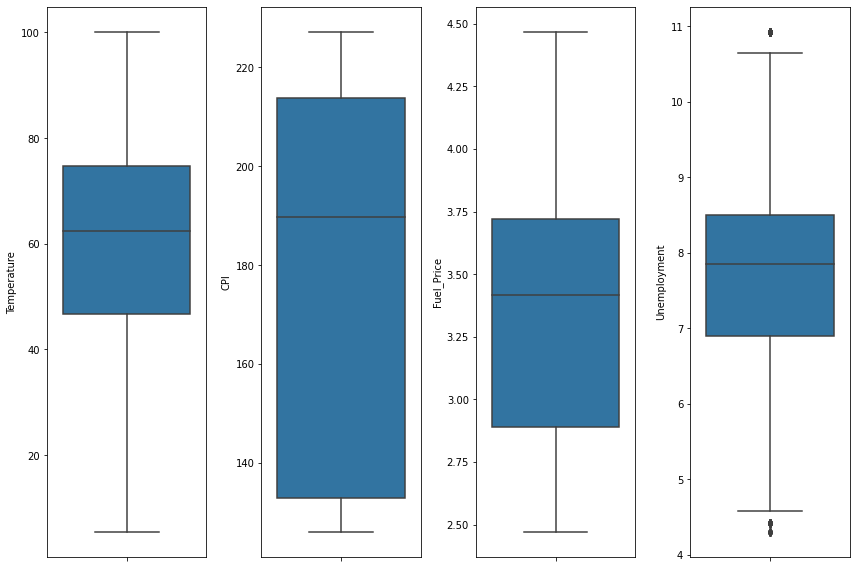

In [21]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,8))


sns.boxplot(y='Temperature', data=retail_df, ax=ax1)

sns.boxplot(y='CPI', data=retail_df, ax=ax2)

sns.boxplot(y='Fuel_Price', data=retail_df, ax=ax3)

sns.boxplot(y='Unemployment', data=retail_df, ax=ax4)


plt.tight_layout()

plt.show()

#### dropping the columns that are not required for Sales prediction

In [22]:
retail_df.drop(["Date"], axis=1, inplace=True)

retail_df.sample(10)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Quarter,Year
4616,35,776838.56,0,60.22,4.062,138.587106,8.512,5,2,2011
440,4,1802677.90,0,56.87,2.805,126.471333,7.896,4,2,2010
1791,14,1882070.88,0,82.33,3.811,186.217789,8.625,7,3,2011
3154,24,1225182.04,0,23.83,3.400,133.183419,8.252,4,2,2011
1318,10,1710803.59,0,49.98,3.312,127.300935,8.744,1,1,2011
4430,34,902050.95,0,79.58,2.612,126.128355,9.816,7,3,2010
5592,43,578209.63,0,80.89,3.786,207.311982,10.581,5,2,2011
2228,17,1051116.95,0,61.48,3.641,129.430600,6.745,9,3,2011
1536,11,1355680.30,0,83.26,3.346,225.306862,6.664,6,2,2012
163,2,1939927.09,0,86.26,2.653,210.995013,8.200,6,2,2010


#### saving the new cleaned dataset to clean_retail_data.csv

In [23]:
retail_df.to_csv("datasets/clean_retail_data.csv", index=False)